# <center>detritalPy: A Python-based Toolset for Visualizing and Analyzing Detrital Geo-Thermochronologic Data</center>

## <center>Glenn R. Sharman, Jonathan P. Sharman, and Zoltan Sylvester</center>

### I. Import required modules
This step must by run initially, but then does not need to be run again for the remainder of the analysis session.

In [1]:
pwd

'/content'

In [2]:
# clone repository
!git clone https://github.com/zsylvester/detritalPy.git

Cloning into 'detritalPy'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 126 (delta 7), reused 12 (delta 3), pack-reused 107
Receiving objects: 100% (126/126), 7.78 MiB | 35.11 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [3]:
cd detritalPy

/content/detritalPy


In [4]:
pwd

'/content/detritalPy'

In [5]:
# install packages
!pip install xlrd
!pip install folium
!pip install vincent
!pip install simplekml

    100% |████████████████████████████████| 112kB 4.0MB/s 
    100% |████████████████████████████████| 81kB 4.3MB/s 
  Running setup.py bdist_wheel for vincent ... - \ done
  Stored in directory: /root/.cache/pip/wheels/4c/0d/8a/65f34c765c6094a71cce3e42a49a26533eef61695e9b505f03
Successfully built vincent
  Running setup.py bdist_wheel for simplekml ... - done
  Stored in directory: /root/.cache/pip/wheels/12/12/8f/9e22dd924dc3cedb41f9888379000713e980478437af610d0e
Successfully built simplekml


In [0]:
# import functions
import detritalFuncs as dFunc
from importlib import reload
import pathlib

### II. Import the dataset as an Excel file
This step must by run initially, and should be repeated if any changes are made to the dataset in Excel

In [0]:
# Import relative file pathway(s)
from pathlib import Path

# Specify file paths to data input file(s)
dataToLoad = [Path("example-data/") / "ExampleDataset_1.xlsx",
              Path("example-data/") / "ExampleDataset_2.xlsx"]

main_df, main_byid_df, samples_df, analyses_df = dFunc.loadDataExcel(dataToLoad)

File pathways can also be harded as shown below (backslashes are used by Windows)

In [0]:
# Specify file paths to data input file(s)
dataToLoad = [r'C:\Users\gsharman\Documents\GitHub\detritalPy\example-data\ExampleDataset_1.xlsx',
              r'C:\Users\gsharman\Documents\GitHub\detritalPy\example-data\ExampleDataset_2.xlsx']

main_df, main_byid_df, samples_df, analyses_df = dFunc.loadDataExcel(dataToLoad)

Execute the following cell if any changes are made to detritalFuncs.py

In [0]:
reload(dFunc);

Optional: run the cell below to plot a distribution of sample size (number of analyses per sample) in the dataset

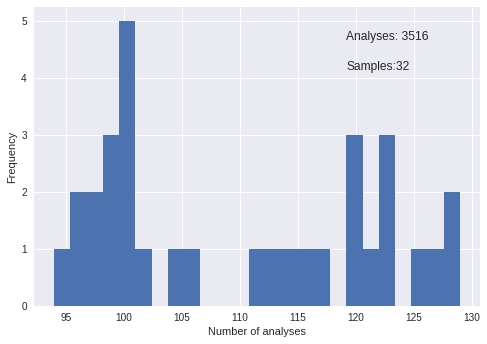

In [0]:
dFunc.plotSampleDist(main_byid_df, numBins=25)

### III. Select samples
Individual or groups of samples can be selected by entering their unique Sample ID's in an array or tuple (see example below for the correct syntax). This sample list will be used for all subsequent plotting and analysis functions.

In [0]:
sampleList = ['POR-1','POR-2','POR-3','BUT-5','BUT-4','BUT-3','BUT-2','BUT-1']

ages, errors, numGrains, labels = dFunc.sampleToData(sampleList, main_byid_df, sigma = '1sigma');

## Plot detrital age distributions
Plot detrital age distributions as cumulative distribution functions (CDFs), probability density plots (PDPs), kernal density estimations (KDEs), histograms, and pie diagrams. Plotting options must be selected below.

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


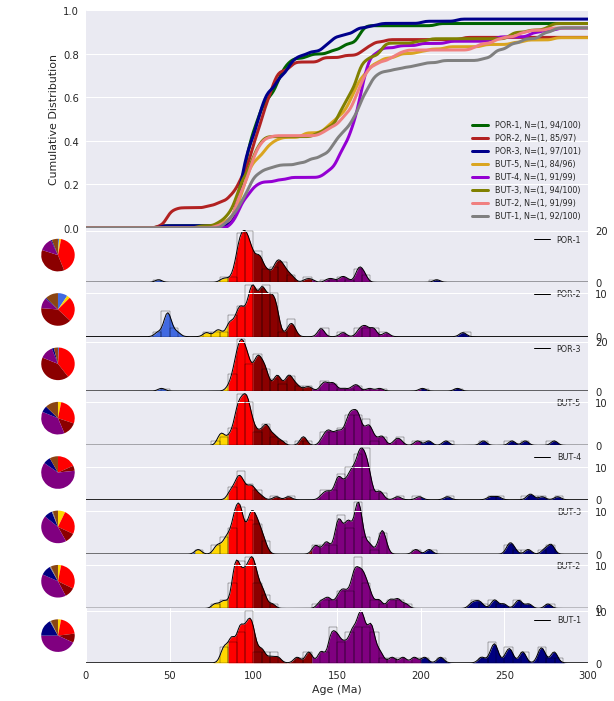

In [9]:
# Enter plot options below
whatToPlot = 'both' # Options: cumulative, relative, or both
separateSubplots = True # Set to True to plot each relative age distribution in a separate subplot (allows histogram and pie)

# Specify the age range (Myr) that you want to plot
x1 = 0
x2 = 300
plotLog = False # Set to True to plot the x-axis as a log scale

# Specify the plot dimensions
w = 10 # width of the plot
c = 4 # height of CDF panel
h = 5 # height of the relative panel (only required if separateSubplots is False). Options: 'auto' or an integer

xdif = 1 # Specify the interval (Myr) over which distributions are calculated

# Cumulative distribution options
plotCDF = False # Plot the CDF discretized at xdif interval
plotCPDP = False # Plot the cumulative PDP
plotCKDE = True # Plot the cumulative KDE
plotDKW = False # Plot the 95% confidence interval of the CDF (Dvoretsky-Kiefer-Wolfowitz inequality)

# Relative distribution options
normPlots = False # Will normalize the PDP/KDE if yes to True (if separateSubplots is True)

plotKDE = True # Set to True if want to plot KDE
colorKDE = False # Will color KDE according to same coloration as used in CDF plotting
colorKDEbyAge = True # Will color KDE according to age populations if set to True
bw = 2 # Specify the KDE bandwidth. Options are 'optimizedFixed', 'optimizedVariable', or a number (bandwidth in Myr)

plotPDP = False # Set to True if want to plot PDP
colorPDP = False # Will color PDP according to same coloration as used in CDF plotting
colorPDPbyAge = False # Will color PDP according to age populations if set to True

plotColorBar = False # Color age categories as vertical bars, can add white bars to create blank space between other colored bars

plotHist = True # Set to True to plot a histogram (only available when separateSubplots is True)
b = 5 # Specify the histogram bin size (Myr)

plotPIE = True # Will plot a pie diagram (only available when separateSubplots is True)

# Specify  age categories for colored KDE, PDP, and/or pie plots
# Sharman et al. 2015 scheme
agebins = [0, 23, 65, 85, 100, 135, 200, 300, 500, 4500]
agebinsc = ['slategray','royalblue','gold','red','darkred','purple','navy','gray','saddlebrown']

plotAgePeaks = False # Will identify and plot age peaks
agePeakOptions = ['KDE', 0.05, 5, 2, True] # [distType, threshold, minDist, minPeakSize, labels]

fig = dFunc.plotAll(sampleList, ages, errors, numGrains, labels, whatToPlot, separateSubplots, plotCDF, plotCPDP, plotCKDE, 
                    plotDKW, normPlots, plotKDE, colorKDE, colorKDEbyAge, plotPDP, colorPDP, colorPDPbyAge, plotColorBar, 
                    plotHist, plotLog, plotPIE, x1, x2, b, bw, xdif, agebins, agebinsc, w, c, h, plotAgePeaks, agePeakOptions,
                    CDFlw=3, KDElw=1, PDPlw=1)

Optional: Run the cell below to save the figure as a pdf file

In [0]:
pathlib.Path('Output').mkdir(parents=True, exist_ok=True) # Recursively creates the directory and does not raise an exception if the directory already exists 
fig.savefig('Output/DZageDistributions.pdf')

## Plot rim age versus core age

In [0]:
sampleList = [(['11-Escanilla','12-Escanilla','10-Sobrarbe','7-Guaso','13-Guaso','5-Morillo','6-Morillo','14AB-M02','14AB-A04','14AB-A05','4-Ainsa','14AB-A06','15AB-352','15AB-118','15AB-150','3-Gerbe','14AB-G07','2-Arro','1-Fosado','14AB-F01'],'All Ainsa Basin')]
    
ages, errors, numGrains, labels = dFunc.sampleToData(sampleList, main_byid_df, sigma = '1sigma');

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


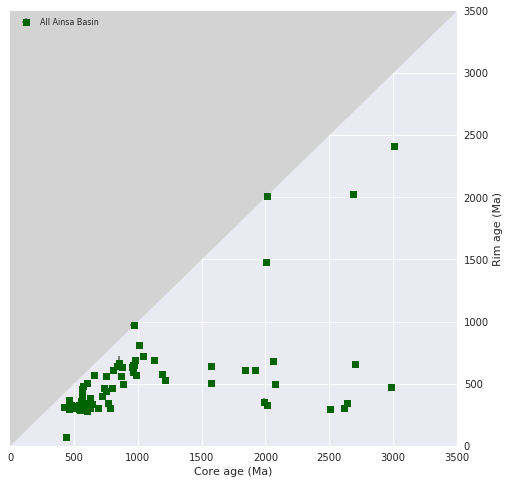

In [0]:
# Specify the age range (Myr) that you want to plot
x1 = 0
x2 = 3500
y1 = 0
y2 = 3500
plotLog = False # Set to True to plot the x-axis as a log scale
plotError = True # Select whether to plot error bars

# Specify the plot dimensions
w = 8 # width of the plot
c = 8 # height of the plot

rimsVsCores = dFunc.plotRimsVsCores(main_byid_df, sampleList, ages, errors, labels, x1, x2, y1, y2, plotLog, plotError, w, c)

Optional: Run the cell below to save the figure as a pdf file

In [0]:
pathlib.Path('Output').mkdir(parents=True, exist_ok=True) # Recursively creates the directory and does not raise an exception if the directory already exists 
rimsVsCores.savefig('Output/rimVsCore.pdf')

## Plot detrital age distributions in comparison to another variable (e.g., Th/U)
Samples or groups of samples will be plotted in two parts 1) an upper scatterplot with an optional moving average, and 2) age distributions (options are to plot probability density plots (PDPs), kernal density estimations (KDE), and/or histograms). The upper plot variable must be a column name within the U_Pb_Data worksheet. 

In [0]:
sampleList = [(['POR-1','POR-2','POR-3'],'Point of Rocks Sandstone'),
              (['BUT-5','BUT-4','BUT-3','BUT-2','BUT-1'],'Butano Sandstone')]

ages, errors, numGrains, labels = dFunc.sampleToData(sampleList, main_byid_df, sigma = '1sigma');

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


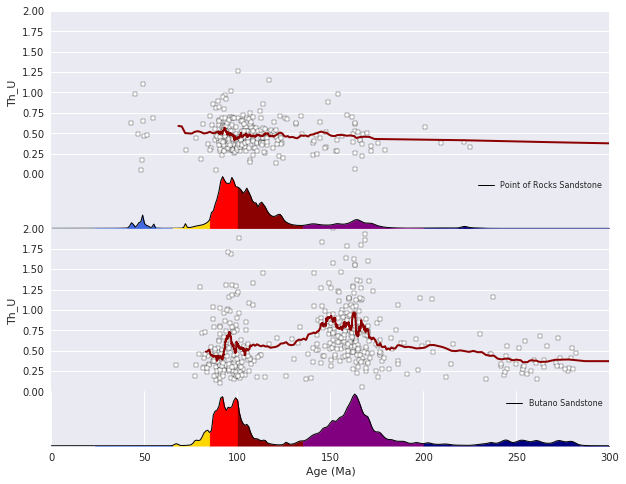

In [0]:
# Select the column to plot in the upper plot
variableName = 'Th_U'
plotError = False # Select True to plot error bars 
variableError = 0.05 # Required if plotError = True: Select the variable name or specify the error as a percentage (e.g., 0.05)

# Specify the age range (Myr) that you want to plot
x1 = 0
x2 = 300
plotLog = False # Set to True to plot the x-axis as a log scale

# Specify the y-axis scale
autoScaleY = False
y1 = 0
y2 = 2

# Specify the plot dimensions
w = 10 # width of CDF panel and distribution plots
t = 3 # height of top panel
l = 1 # height of the bottom panel

# Specify the interval (Myr) over which distributions are calculated
xdif = 1

# Relative distribution options
normPlots = False # Will normalize the PDP/KDE if yes to True

plotKDE = False # Set to True if want to plot KDE
colorKDE = False # Will color KDE according to same coloration as used in CDF plotting
colorKDEbyAge = True # Will color KDE according to age populations if set to True
bw = 10 # Specify the KDE bandwidth. Options are 'optimizedFixed', 'optimizedVariable', or a number (bandwidth in Myr)

plotPDP = True # Set to True if want to plot PDP
colorPDP = False # Will color PDP according to same coloration as used in CDF plotting
colorPDPbyAge = True # Will color PDP according to age populations if set to True

plotColorBar = False # Color age categories as vertical bars, can add white bars to create blank space between other colored bars

plotHist = False # Set to True to plot a histogram
b = 5 # Specify the histogram bin size (Myr)

#Sharman et al. 2015 scheme
agebins = [0, 23, 65, 85, 100, 135, 200, 300, 500, 4500]
agebinsc = ['slategray','royalblue','gold','red','darkred','purple','navy','gray','saddlebrown']

plotMovingAverage = True
windowSize = 25

figDouble = dFunc.plotDouble(sampleList, main_byid_df, ages, errors, numGrains, labels, variableName, plotError, variableError, normPlots,
                     plotKDE, colorKDE, colorKDEbyAge, plotPDP, colorPDP, colorPDPbyAge, plotHist, x1, x2, autoScaleY, y1, y2, b,
                     bw, xdif, agebins, agebinsc, w, t, l, plotLog, plotColorBar, plotMovingAverage, windowSize, KDElw=1, PDPlw=1);

Optional: Run the cell below to save the figure as a pdf file

In [0]:
pathlib.Path('Output').mkdir(parents=True, exist_ok=True) # Recursively creates the directory and does not raise an exception if the directory already exists 
figDouble.savefig('Output/doublePlot.pdf')

## Plot detrital age populations as a bar graph

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


TypeError: ignored

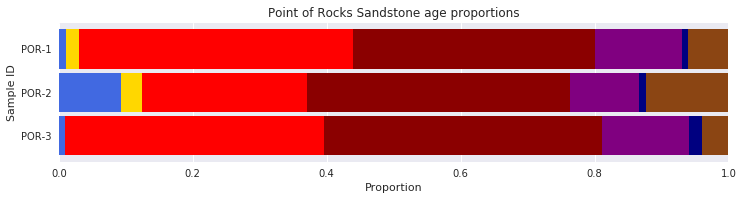

In [0]:
# Specify plot parameters
overlap = 0.9
width = 6
height = 0.75

# Specify  age population boundaries and colors
# Sharman et al. 2015 scheme
agebins = [0, 23, 65, 85, 100, 135, 200, 300, 500, 4500]
agebinsc = ['slategray','royalblue','gold','red','darkred','purple','navy','gray','saddlebrown']

# Specify whether to separate grouped sample lists into individual samples
separateGroups = True # Set to True to separate groups into their individual samples

fileName = 'ageProportions.csv' # Specify file name to save

savePlot = True #Specify whether to save output plots as PDF files

dFunc.ageProportionsCSV(ages, errors, numGrains, labels, agebins, fileName)
figBar = dFunc.plotBar(width, height, overlap, main_byid_df, sampleList, ages, numGrains, labels, agebins, agebinsc, separateGroups, savePlot)

## Plot sample locations on an interactive map
Samples with coordinate information (latitude and longitude in WGS84 coordinates) can be plotted on an interactive map. This functionality requires the following modules must be installed: folium and vincent. These can be installed via the python command line prompt by entering "pip install folium" and "pip install vincent".

In [0]:
# Specify whether age distributions should be enabled (can be viewed by clicking on samples)
plotMapKDE = True # Choose True to enable KDEs when samples are selected
plotMapPDP = False # Choose True to enable PDPs when samples are selected
plotCumulative = False # Choose True to plot either a cumulative KDE or PDP. A discretized CDF will be plotted if KDE and PDP are both set to False

# Specify the upper age limit that you want to plot
x2 = 300
# Specify the KDE bandwidth
bw = 1.5 # Specify the KDE bandwidth. Options are 'optimizedFixed', 'optimizedVariable', or a number (bandwidth in Myr)

mapType = 'World_Topo_Map' # Options: 'NatGeo_World_Map', 'World_Street_Map', 'World_Topo_Map', 'World_Light_Gray',
                             # 'World_Shaded_Relief', 'World_Terrain_Base', 'World_Hillshade', 'World_Physical_Map'

exportKML = True
descrpt = 'Unit' # Description to be included with each sample
    
dFunc.plotFoliumMap(sampleList, main_byid_df, ages, errors, numGrains, plotMapKDE, 
                             plotMapPDP, plotCumulative, x2, bw, mapType, exportKML, descrpt)

1.9967499999999987
2.484561111111006
latitude 1.9967499999999987 -> (2.5, 7)
longitude 2.484561111111006 -> (2.5, 7)


## Plot and export maximum depositional age (MDA) calculations
Calculate the maxmium depositional age (MDA) for a sample or group of samples. Results will be exported to a CSV file. Individual plots will be made for each sample or group of samples showing the youngest grains and different calculations of the maxmimum depositional age.

In [0]:
sampleList = ['POR-1','POR-2','POR-3']

ages, errors, numGrains, labels = dFunc.sampleToData(sampleList, main_byid_df, sigma = '1sigma');

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


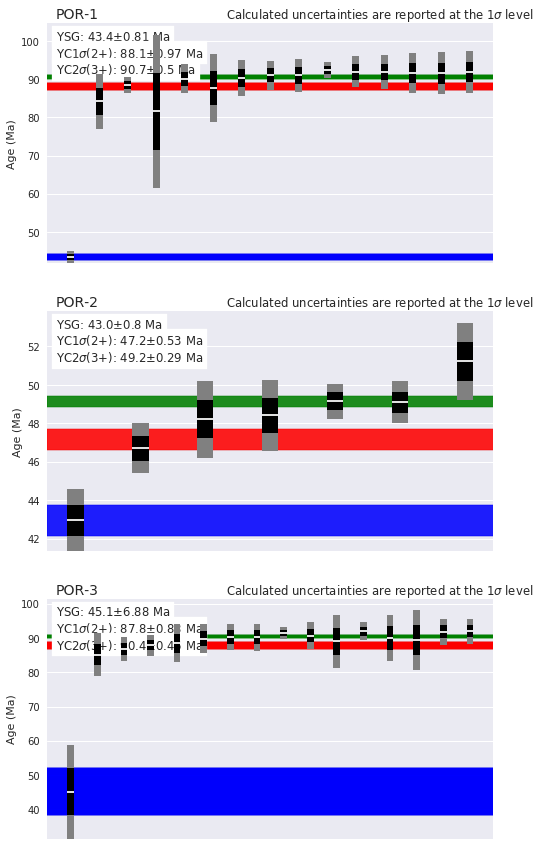

In [0]:
# Specify output CSV file
fileName = 'MDA.csv'

# Specify whether to create a plot showing youngest ages and MDA calculations
makePlot = True

# Specify how grains are sorted: by best age, best age + 1 sigma error, or best age + 2 sigma error
sortBy = '1sigma' # Options: 'mean', '1sigma', '2sigma'

# Specify plot parameters
plotWidth = 8
plotHeight = 5
barWidth = 0.25 # A value of 1 yields 100% overlap
ageColors = ['blue','red','green'] # Specify color of horizontal bars for YSG, YC1S(2+), and YC2s(3+), respectively
fillMDACalcs = True # Select True to shade each MDA calculation within 1 sigma confidence limits
alpha = 0.25 # Specifies the transparency of the MDA calculation colors

figMDA = dFunc.MDAtoCSV(sampleList, ages, errors, numGrains, labels, fileName, sortBy, barWidth, plotWidth, plotHeight, 
                        ageColors, alpha, makePlot, fillMDACalcs)

Optional: Run the cell below to save the figure as a pdf file

In [0]:
pathlib.Path('Output').mkdir(parents=True, exist_ok=True) # Recursively creates the directory and does not raise an exception if the directory already exists 
figMDA.savefig('Output/MDAplots.pdf')

## Multi-dimensional scaling
Create a multi-dimensional scaling (MDS) plot for individual samples or groups of samples.

In [0]:
sampleList = ['POR-1','POR-2','POR-3','BUT-5','BUT-4','BUT-3','BUT-2','BUT-1','SJB-1','SEF-1','TEJ-2','TEJ-1']

ages, errors, numGrains, labels = dFunc.sampleToData(sampleList, main_byid_df, sigma = '1sigma');

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


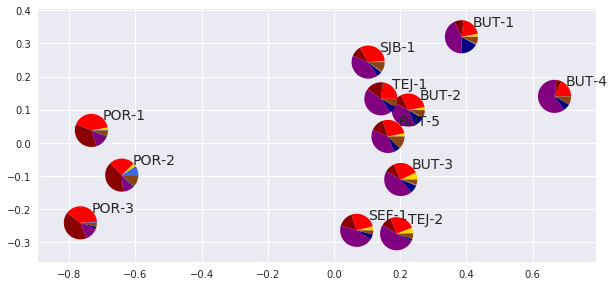

In [0]:
metric = False # Set to True for metric MDS; set to False for non-metric MDS

criteria = 'Dmax' # Options: 'Dmax', 'Vmax'

plotWidth = 10
plotHeight = 8

plotPie = True
pieSize = 0.05

# Sharman et al. 2015 scheme
agebins = [0, 23, 65, 85, 100, 135, 200, 300, 500, 4500]
agebinsc = ['slategray','royalblue','gold','red','darkred','purple','navy','gray','saddlebrown']

figMDS, stress = dFunc.MDS(ages, errors, labels, sampleList, metric, plotWidth, plotHeight, plotPie, pieSize, agebins, agebinsc, criteria)

In [0]:
pathlib.Path('Output').mkdir(parents=True, exist_ok=True) # Recursively creates the directory and does not raise an exception if the directory already exists 
figMDS.savefig('Output/MDSplot.pdf')

## (U-Th)/He vs U-Pb age "double dating" plot
Creates a figure where detrital cooling ages are plotted against detrital crystallization ages.

In [0]:
sampleList = [(['11-Escanilla','12-Escanilla','10-Sobrarbe','7-Guaso','13-Guaso','5-Morillo','6-Morillo','14AB-M02','14AB-A04','14AB-A05','4-Ainsa','14AB-A06','15AB-352','15AB-118','15AB-150','3-Gerbe','14AB-G07','2-Arro','1-Fosado','14AB-F01'],'All Ainsa Basin')]

ages, errors, numGrains, labels = dFunc.sampleToData(sampleList, main_byid_df,  sigma = '1sigma');

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


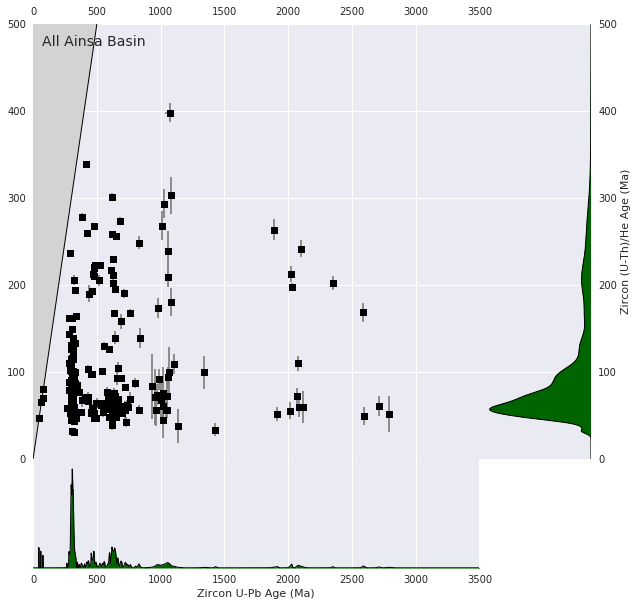

In [0]:
# Specify plotting extents
x1 = 0
x2 = 3500
y1 = 0
y2 = 500

# Specify plotting options
plotKDE = False # Set to True if want to plot KDE
colorKDE = False # Will color KDE according to same coloration as used in CDF plotting
colorKDEbyAge = True # Will color KDE according to age populations if set to True
# Specify the KDE bandwidth
bw = 10 # Specify the KDE bandwidth. Options are 'optimizedFixed', 'optimizedVariable', or a number (bandwidth in Myr)

plotPDP = True # Set to True if want to plot PDP
colorPDP = True # Will color PDP according to same coloration as used in CDF plotting
colorPDPbyAge = False # Will color PDP according to age populations if set to True

plotHist = False # Set to True if want to plot histogram
b = 25 # Specify the histogram bin size

# Specify the interval over which distributions are calculated
xdif = 1

# Specify plot dimensions (recommend width=height)
width=10
height=10

savePlot = True #Specify whether to save output plots as PDF files

agebins = [0, 66, 180, 280, 310, 330, 410, 520, 700, 900, 1200, 1500, 3500]
agebinsc = ['olivedrab','purple','lightskyblue','lightseagreen','lightsteelblue','gold','sandybrown','orange','darkorange','firebrick','orchid','gray']

figDoubleDating = dFunc.plotDoubleDating(main_byid_df, sampleList, x1, x2, y1, y2, plotKDE, colorKDE, colorKDEbyAge, plotPDP, colorPDP,
                     colorPDPbyAge, plotHist, b, bw, xdif, width, height, savePlot, agebins, agebinsc);

## Export sample comparison matrices as a CSV file
Creates matricies of sample comparisons using a number of different metrics (see Saylor and Sundell, 2016). Similiarity, likness, Kolgomorov-Smirnov statistic (Dmax and p-value), Kuiper statistic (Vmax and p-value), and cross-correlation of relative probability density functions. Similiarty, likeness, and cross-correlation values are computed based on either the probability density plot (PDP) or kernal density estimation (KDE).

In [0]:
sampleList = ['POR-1','POR-2','POR-3']

ages, errors, numGrains, labels = dFunc.sampleToData(sampleList, main_byid_df, sigma = '1sigma');

In [0]:
calculateSimilarity = True
calculateLikeness = True
calculateKS = True
calculateKuiper = True
calculateR2 = True
fileName = 'interSampleComparison.csv'

# Specify what type of relative distribution to compare for similarity, likeness, and cross-correlation calculations
distType = 'KDE' # Options are 'PDP' or 'KDE'
bw = 10 # Specify the bandwidth for the KDE distribution. Options are 'optimizedFixed','optimizedVariable', or a number (Ma)

dFunc.calcComparisonCSV(ages, errors, numGrains, labels, sampleList, calculateSimilarity, calculateLikeness,
                        calculateKS, calculateKuiper, calculateR2, fileName, distType, bw)

## Export detrital age distributions as a CSV file
Creates a CSV file with raw age distribution data. Distribution types supported are cumulative density functions (CDFs), probability density plots (PDPs), and kernal density estimations (KDEs).

In [0]:
# Specify export options
exportType = 'CDF' # Options: 'CDF', 'PDP' or 'KDE'
cumulative = False # Only applies if exportType = 'PDP' or 'KDE'

# Specify the age range that you want to export
x1 = 0
x2 = 3500
# Specify the KDE bandwidth
bw = 15 # Options are 'optimizedFixed', 'optimizedVariable', or a number (bandwidth in Ma)
# Specify the interval over which distributions are calculated
xdif = 1
# Require distributions to sum to 1
normalize = True

# Specify file name to save
fileName = 'Dist_to_CSV.csv'

dFunc.exportDist(ages, errors, labels, exportType, cumulative, x1, x2, xdif, bw, fileName, normalize)

## Export ages and errors in tabular format as a CSV file
Creates a CSV file with sample or sample group ages and 1 sigma errors reported in the two-column format that is used by other plotting and analysis software (e.g., DZstats (Saylor and Sundel, 2016) and Arizona LaserChron Center in-house excel macros).

In [0]:
# Specify file name to save
fileName = 'AgeError_toCSV.csv'

dFunc.agesErrorsCSV(ages, errors, sampleList, fileName)